In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('data_for_lr.csv')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [26]:
df.isnull().sum()

x    0
y    1
dtype: int64

In [27]:
df = df.dropna()
print('shape of the data:', df.shape)

shape of the data: (699, 2)


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [29]:
train_input = np.array(df.x[0:500]).reshape(500,1)
train_input

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [30]:
test_input = np.array(df.x[500:699]).reshape(199,1)
test_output = np.array(df.y[500:699]).reshape(199,1)

## forward propagation

f(x) = m*x+c

In [31]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## Cost Function

In [32]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## Gradient Descent

In [33]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## Update Parametres

In [34]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Train The Data

In [35]:
def train(train_input, train_output, learning_rate, iters):
    
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    loss = list()
    
    for i in range(iters):
        
        predictions = forward_propagation(train_input, parameters)
        
        cost = cost_function(predictions, train_output)
        
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        
        derivatives = backward_propagation(train_input, train_output, predictions)
  
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## Training

Iteration = 1, Loss = 3280.247772114775


<Figure size 640x480 with 0 Axes>

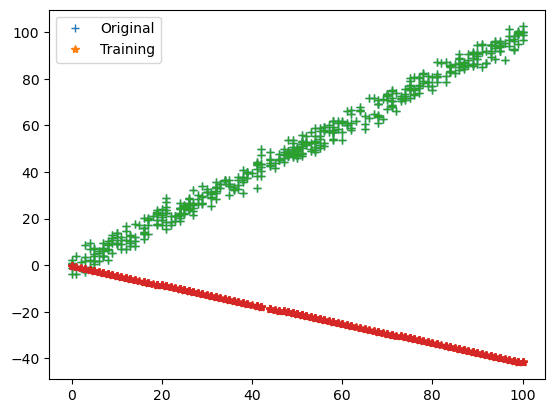

Iteration = 2, Loss = 1490.3901559714632


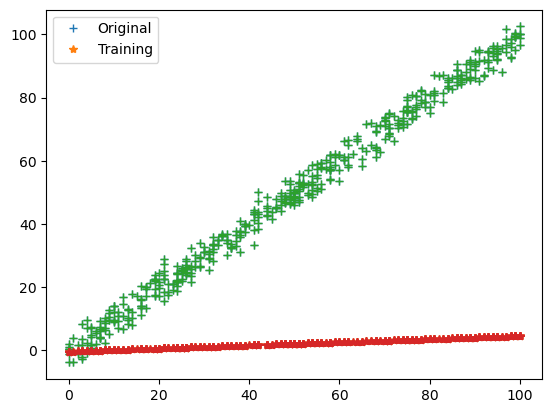

Iteration = 3, Loss = 678.3297729123307


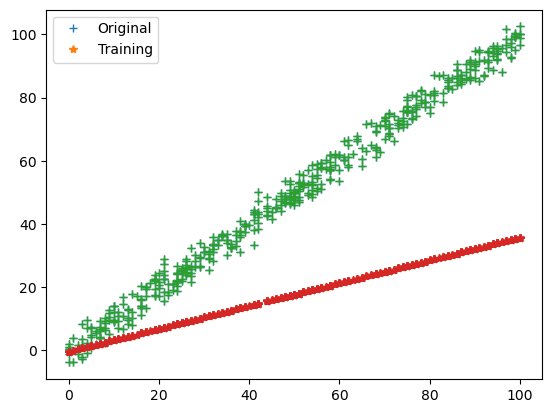

Iteration = 4, Loss = 309.8970775520096


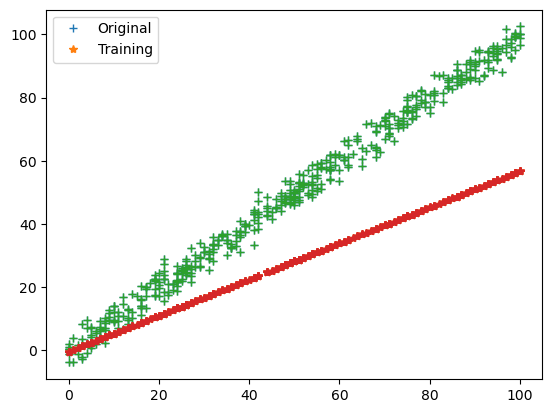

Iteration = 5, Loss = 142.73875548095435


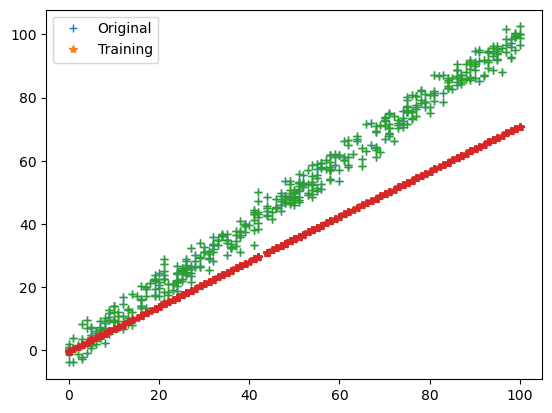

Iteration = 6, Loss = 66.89883951103513


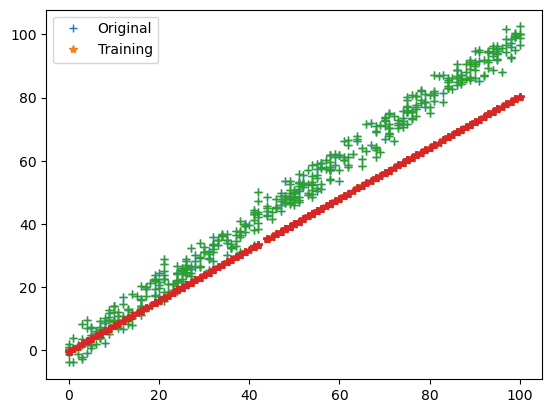

Iteration = 7, Loss = 32.49018553723632


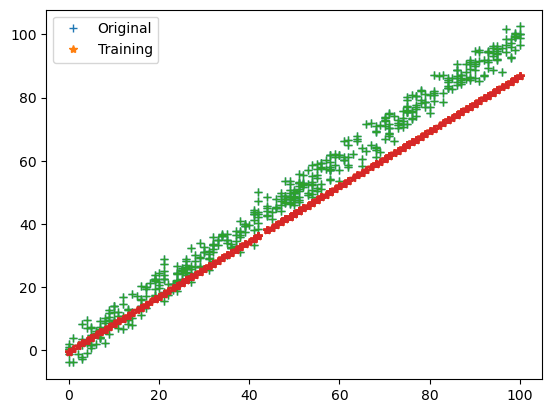

Iteration = 8, Loss = 16.87894102205542


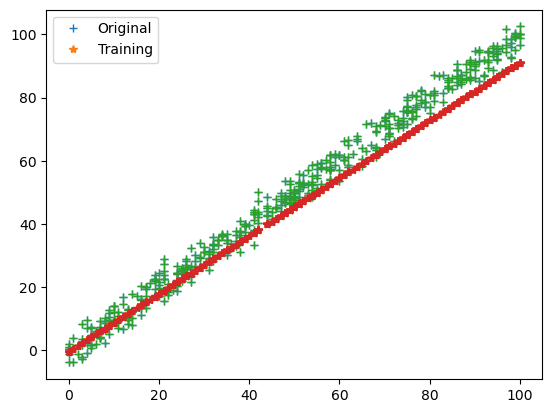

Iteration = 9, Loss = 9.796101999039674


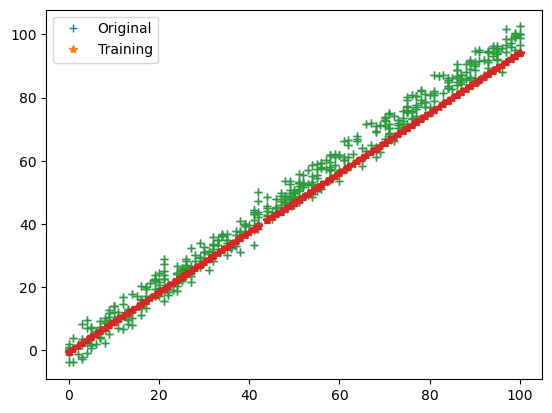

Iteration = 10, Loss = 6.582609994237469


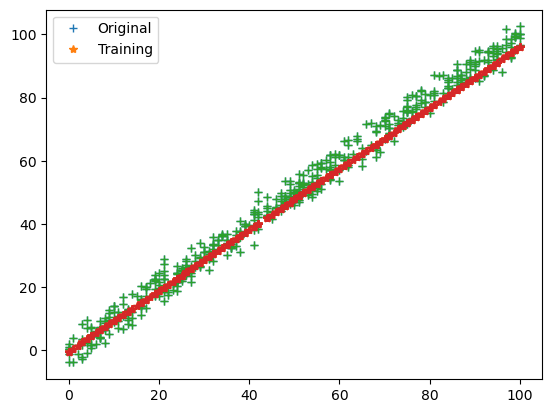

Iteration = 11, Loss = 5.124645017451736


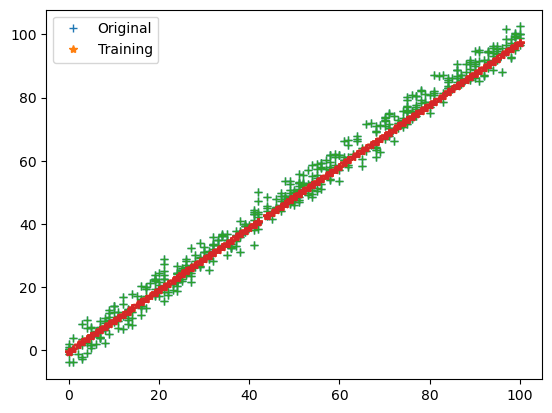

Iteration = 12, Loss = 4.4631645977759415


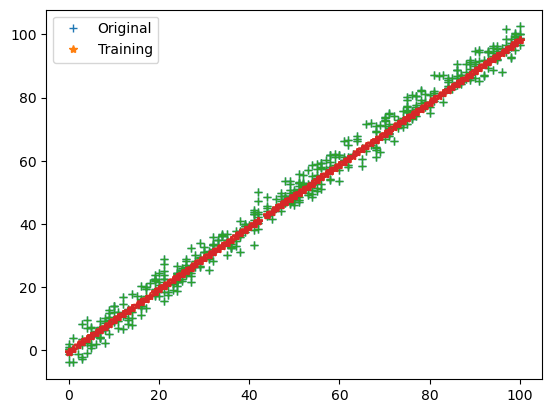

Iteration = 13, Loss = 4.163050103884832


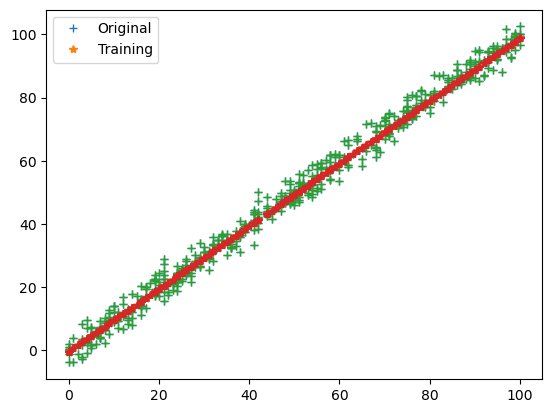

Iteration = 14, Loss = 4.026887730790799


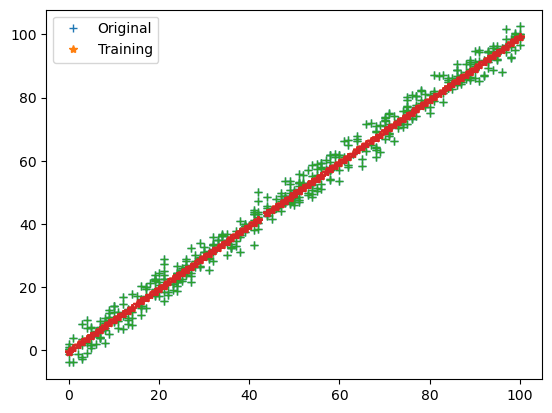

Iteration = 15, Loss = 3.9651106165072956


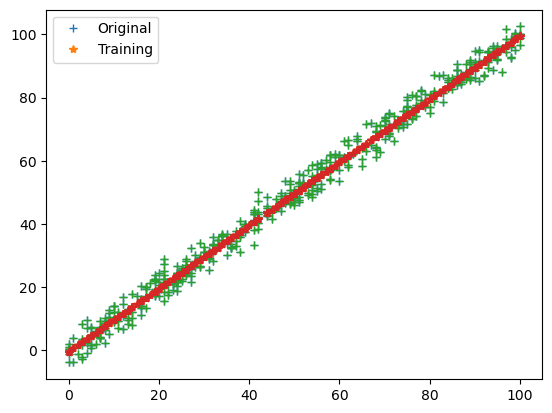

Iteration = 16, Loss = 3.937082176543086


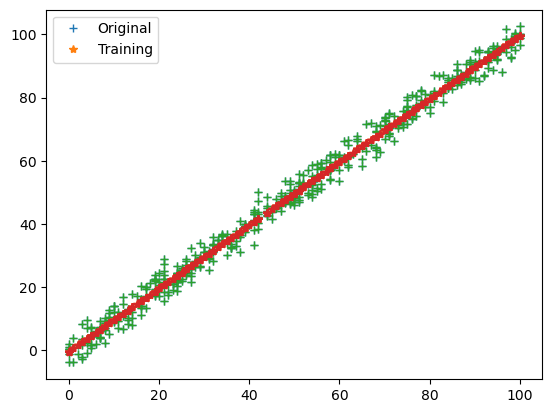

Iteration = 17, Loss = 3.9243655475037387


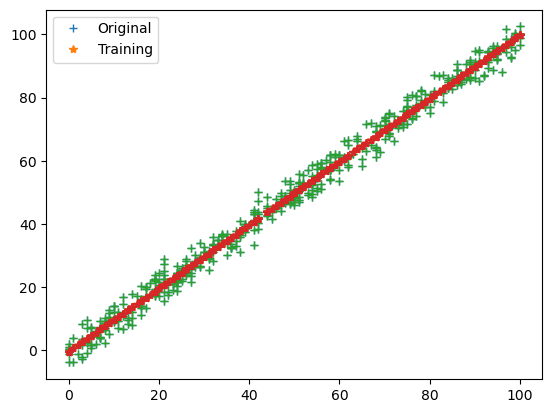

Iteration = 18, Loss = 3.918595904045766


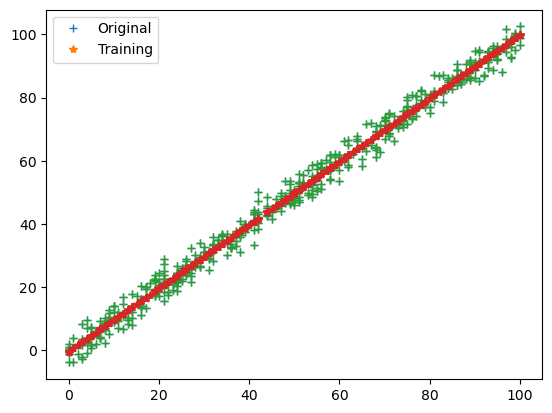

Iteration = 19, Loss = 3.915978115645606


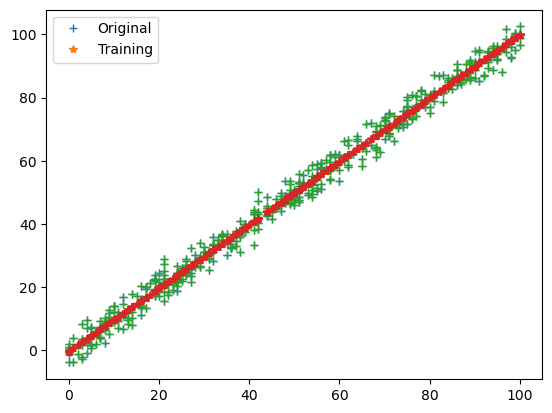

Iteration = 20, Loss = 3.9147903273810756


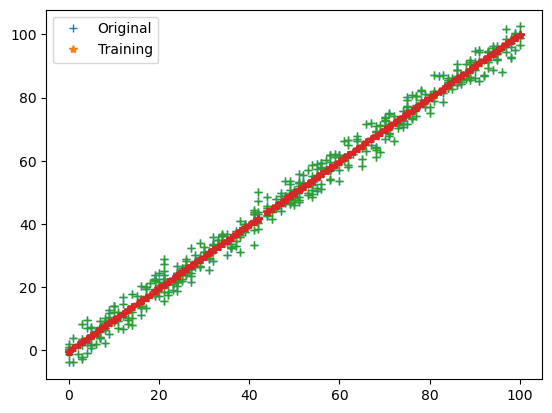

In [36]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [37]:
print(parameters)

{'m': 1.0029792055258056, 'c': -0.40138310471797284}


## Prediction

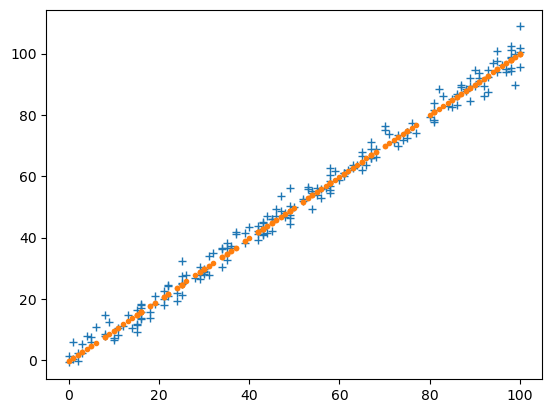

In [38]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

## Cost for Data

In [39]:
cost_function(test_predictions, test_output)

4.046729052878891